In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('../../data/processed/land_dataset_final_v2.csv')

In [26]:
# Show shape and info
print("Shape:", df.shape)
df.info()
df.describe(include='all')

Shape: (9272, 234)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9272 entries, 0 to 9271
Columns: 234 entries, address_subdivision to f_unused
dtypes: float64(3), int64(226), object(5)
memory usage: 16.6+ MB


,address_subdivision,address_locality,address_line_2,h_id,price_per_m2,land_area,price,longitude,latitude,near_Koh_Pich_in_km,...,f_road,f_secondary,f_service,f_steps,f_tertiary,f_track,f_trunk,f_trunk_link,f_unclassified,f_unused
count,9272,9272,9272,9272,9272.000000,9272.000000,9272.000000,9272.000000,9272.000000,9272.000000,...,9272.0,9272.000000,9272.000000,9272.000000,9272.000000,9272.000000,9272.000000,9272.000000,9272.000000,9272.0
unique,1,12,96,840,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Phnom Penh,Pur SenChey,Ponsang,8865846aebfffff,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9272,1773,338,126,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1928.229895,139.976057,139.976057,104.872119,11.554628,10.564280,...,0.0,0.068809,0.485764,0.004422,0.223469,0.080242,0.041523,0.006579,0.078732,0.0
std,NaN,NaN,NaN,NaN,2213.825351,63.379229,63.379229,0.066089,0.065278,6.348214,...,0.0,0.253143,0.499824,0.066354,0.416592,0.271681,0.199507,0.080848,0.269334,0.0
min,NaN,NaN,NaN,NaN,23.320000,30.000000,30.000000,104.710219,11.412863,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,NaN,NaN,NaN,NaN,314.812500,86.000000,86.000000,104.822744,11.508944,5.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,NaN,NaN,NaN,NaN,903.055000,140.000000,140.000000,104.885239,11.553634,11.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,NaN,NaN,NaN,NaN,3031.190000,196.000000,196.000000,104.919268,11.589735,16.000000,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [27]:
df.isnull().sum()

address_subdivision    0
address_locality       0
address_line_2         0
h_id                   0
price_per_m2           0
                      ..
f_track                0
f_trunk                0
f_trunk_link           0
f_unclassified         0
f_unused               0
Length: 234, dtype: int64

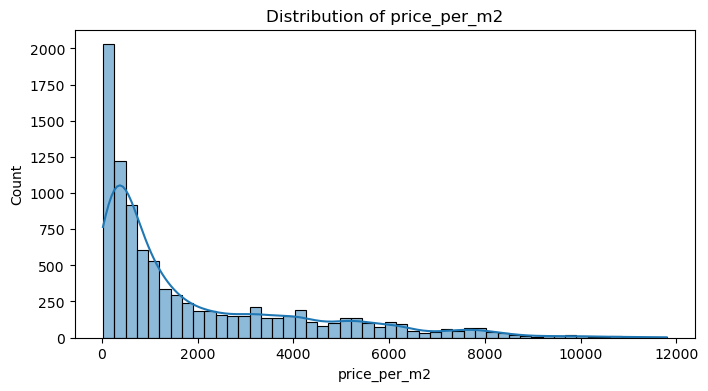

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['price_per_m2'], bins=50, kde=True)
plt.title('Distribution of price_per_m2')
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
# Apply Label Encoding to categorical columns
label_encoders = {}
for col in df_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le


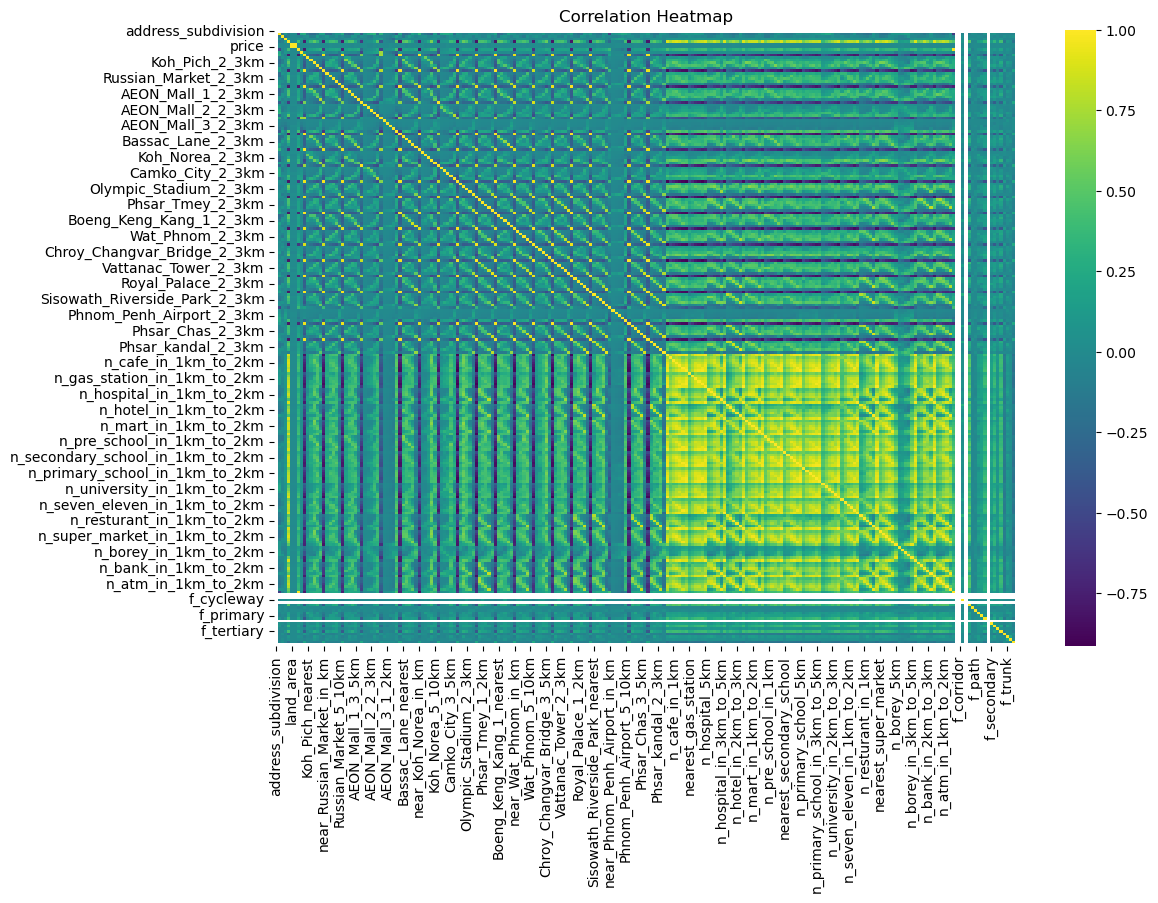

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=False, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

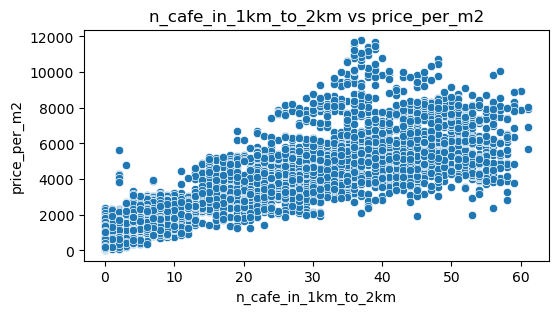

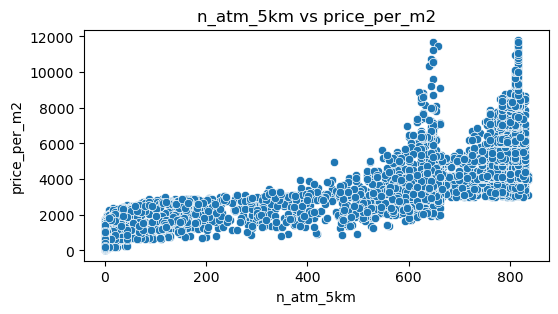

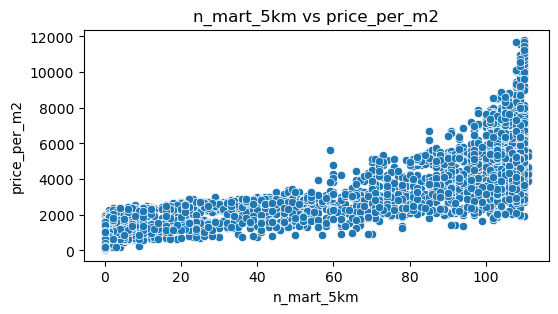

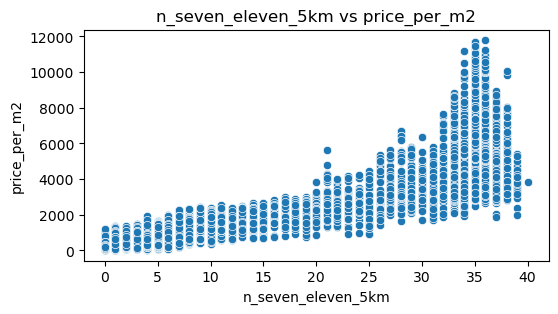

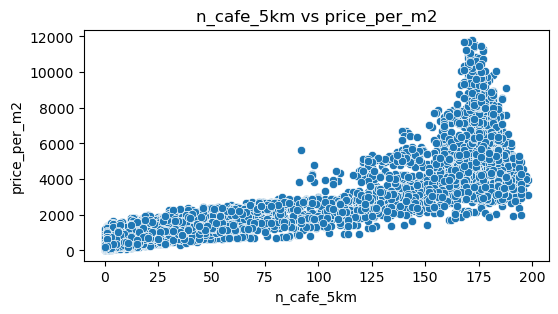

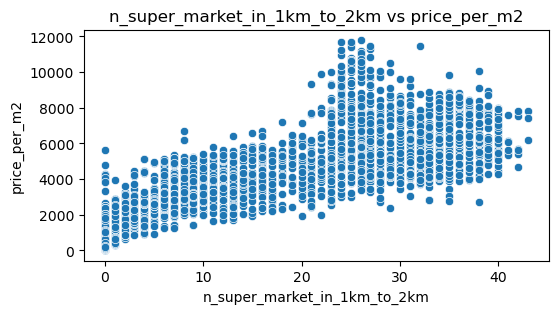

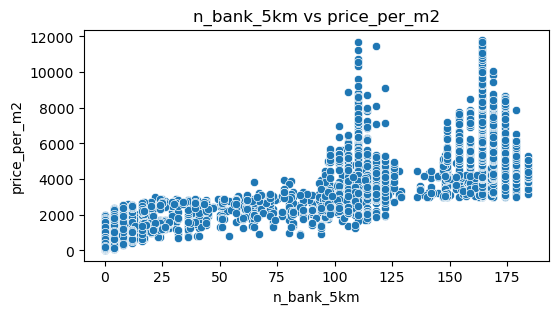

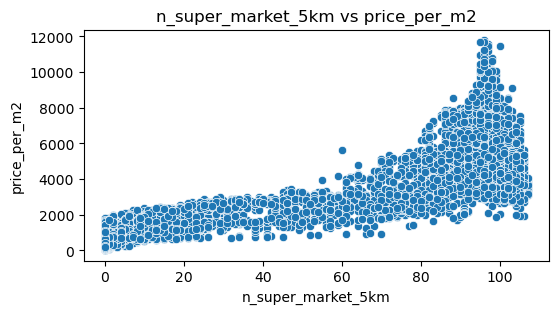

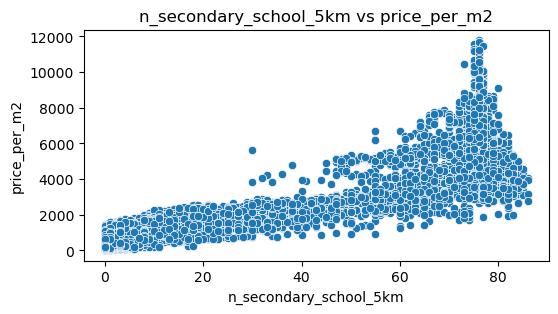

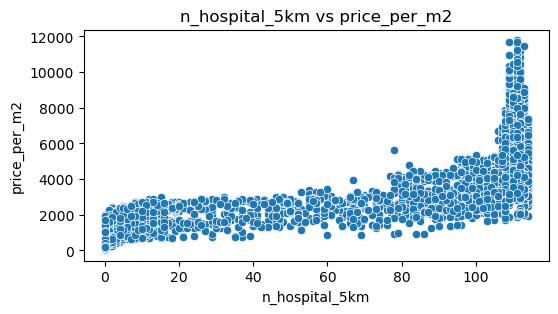

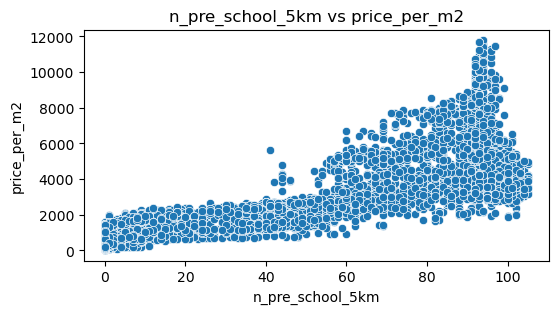

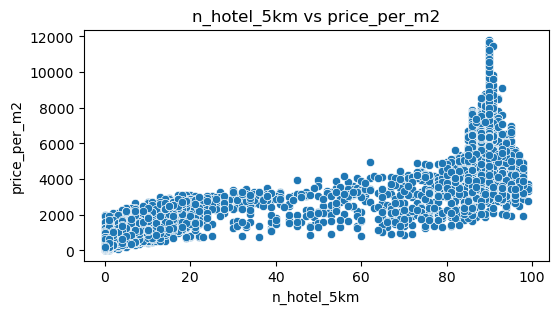

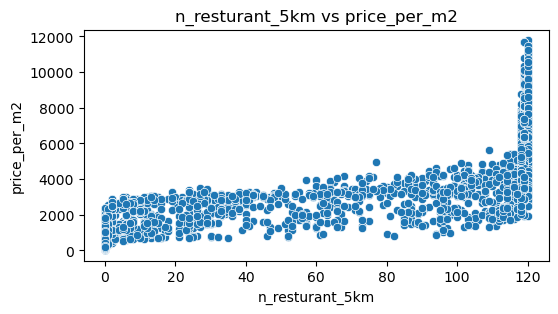

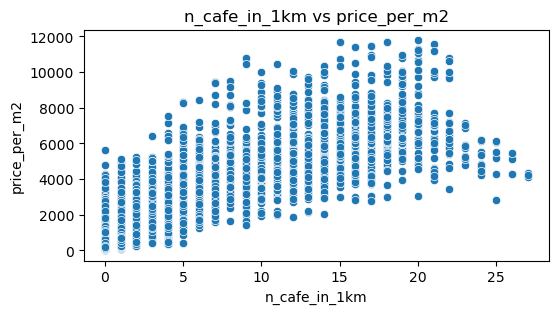

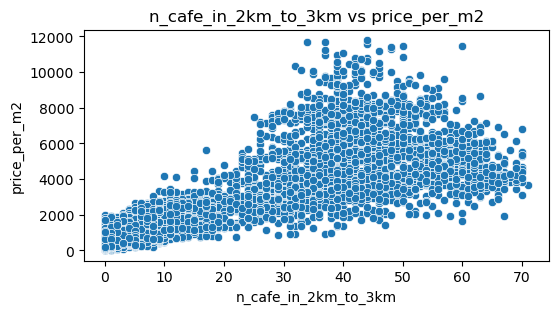

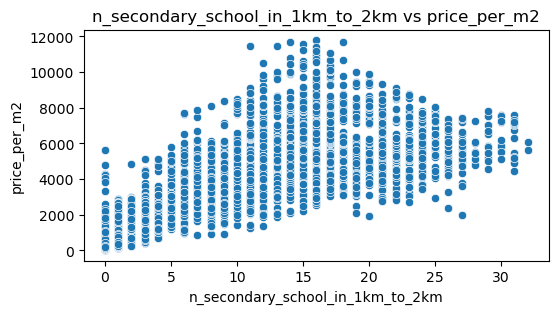

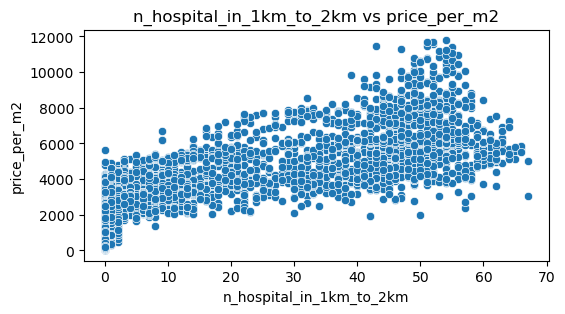

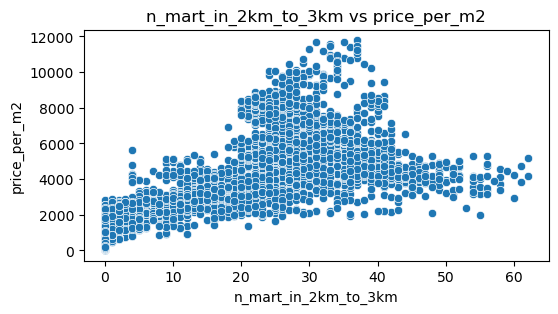

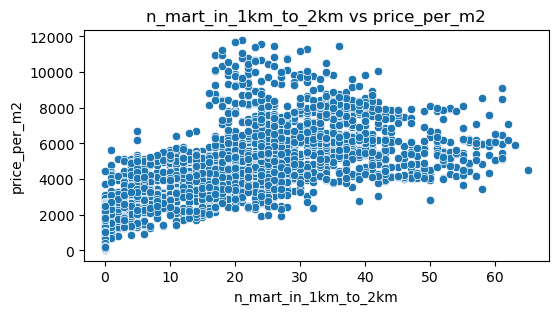

In [34]:
top_features = df_encoded.corr()['price_per_m2'].abs().sort_values(ascending=False)[1:20].index
for col in top_features:
    plt.figure(figsize=(6,3))
    sns.scatterplot(x=df_encoded[col], y=df_encoded['price_per_m2'])
    plt.title(f'{col} vs price_per_m2')
    plt.show()

In [32]:
# cat_cols = df.select_dtypes(include=['object', 'category']).columns
# for col in cat_cols:
#     plt.figure(figsize=(8,3))
#     sns.boxplot(x=df[col], y=df['price_per_m2'])
#     plt.title(f'{col} vs price_per_m2')
#     plt.xticks(rotation=45)
#     plt.show()

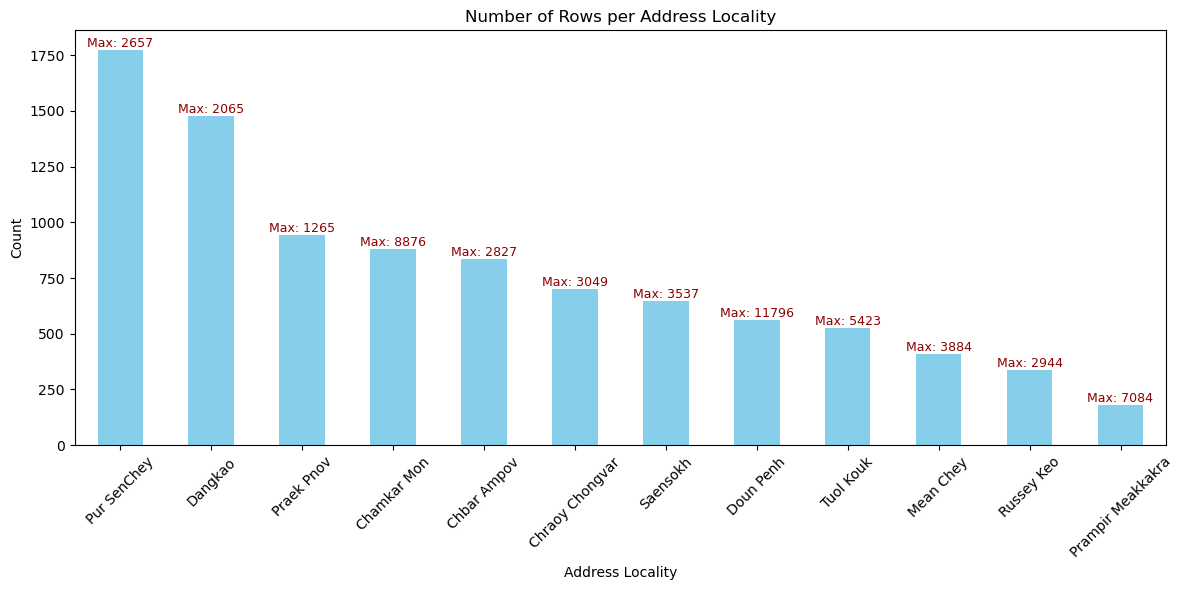

In [33]:
plt.figure(figsize=(12,6))
ax = df['address_locality'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Rows per Address Locality')
plt.xlabel('Address Locality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Prepare a mapping from locality to max price_per_m2
max_price = df.groupby('address_locality')['price_per_m2'].max()

# Add max price_per_m2 labels on top of each bar
for p in ax.patches:
    locality = p.get_x() + p.get_width() / 2
    label = ax.get_xticklabels()[int(p.get_x() + p.get_width() / 2)].get_text()
    price = max_price[label]
    ax.annotate(f'Max: {price:.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='darkred')

plt.show()